# Individual HW2: Predict Customer Churn

![Image of Customer Churn](https://www.retentionscience.com/wp-content/uploads/2016/05/customerchurn_775x425_612.png)

## Introduction

<div style="text-align: justify">

In this assignment, I will be analysing a dataset on Telco Customer Churn and creating a machine learning model that is able to predict whether a customer will churn, i.e. leave the company. Most telecommunication companies suffer from voluntary churn of customers and this is a serious problem that affects the company's profit. When telecommunication companies try to attract new customers, they have spent a lot of resources and when they lose these customers, they do not only lose future profits but also the resources that had been spent in acquiring them. Hence, it is generally desirable to seek the reasons behind why customers churn, so that the telecommunication company can strategise and reduce the number of customers churning in the future.

</div>

This notebook will follow this structure:
1. Exploratory Data Analysis and Data Cleaning
2. Feature Engineering
3. Creation of Machine Learning Model and Ensemble Learning
4. Conclusion

## Exploratory Data Analysis and Data Cleaning

<div style="text-align: justify">

Before creating a machine learning model, it is important to ensure that the dataset is in a suitable format. For example, we should deal with missing values in the dataset as this will cause problem during modelling. We would also need to pre-process the data so that it has the correct variable type, e.g. numerical, categorical, etc. This highlights the importance of data cleaning.

<br><br>

It is also important to note that not all machine learning model works equally well for all kind of dataset. Therefore, it is important to find out more about our dataset through exploratory data analysis to choose what model will be the most appropriate in this case.

</div>

In [141]:
# Import all the libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [142]:
# Read the data from csv
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [143]:
# Preview the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [144]:
# More information about the dataset
print df.shape
print df.info()

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), in

<div style="text-align: justify">

From this, we can see that there are <b>7043 rows and 21 columns</b> in the csv. Out of the 21 columns, Churn will be the <b>label</b> we are trying to predict. The other 20 columns are <b>features</b> available for manipulation. As seen above, some of the features are numerical and most of them are categorical. Let us explore these features further.

</div>

In [145]:
# Describing the numerical features
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [146]:
# Describing the categorical features
df.describe(include=['object'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,5199-FPUSP,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


At this stage, there are some notable observations:
- The feature 'Senior Citizen' is a categorical variable that has been coded as binary variable (0 or 1) and hence appears as numerical variable
- The feature 'Total Charges' seems to be classified as categorical variable, though the column has mainly numerical values. It is also worth noting that the mode for this column is a space, appearing 11 times. This seems to suggest that the column 'Total Charges' has <b>some missing values</b>, which needs to be cleaned

With these in mind, we move on to the data cleaning step.

### Fill in the missing values for 'Total Charges'

In [147]:
df['TotalCharges'] = df['TotalCharges'].map(lambda x: None if x == ' ' else x) # Convert space to None
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df[['tenure','MonthlyCharges','TotalCharges']][df['TotalCharges'].isnull()]

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


<div style="text-align: justify">

It seems that the missing values for TotalCharges are because these customers are new, as seen from the zero tenure. Thus, it is only logical to assume that the total charges for these customers would also be zero. Hence, we could simply <b>fill up the missing values with zero</b>.

</div>

In [148]:
# Now TotalCharges will be a numerical feature with no missing values
df['TotalCharges'] = df['TotalCharges'].fillna(0)

### Drop customerID

<div style="text-align: justify">

It is worth noting that customerID is simply a unique identifier of each row that is generated randomly for each customer and is unlikely to be correlated to whether a customer will churn or not. Thus, we can drop this column and not include it in our machine learning model.

</div>

In [149]:
df = df.drop(['customerID'], axis = 1)

### Convert categorical data to numerical data

<div style="text-align: justify">

In this dataset, there are multiple categorical features and <b>representing different categories for each features using a number</b> may be helpful for feature engineering step. However, simply translating each category into an arbitrary number may not be ideal as the machine learning model will <b>treat these numbers as ordinal values</b>, i.e. the category represented by the number 5 is considered 'higher' than the category represented by the number 1. This is not exactly what we want. Instead, I will create <b>dummy variables for all the categorical variables</b>, where each dummy variable is a binary variable, representing whether the data belongs to a particular class in that column or not.

</div>

In [150]:
df['SeniorCitizen'] = df['SeniorCitizen'].map(lambda x: "Yes" if x == 1 else "No") # Convert SeniorCitizen back to categorical
df['Churn'] = df['Churn'].map(lambda x: 1 if x == "Yes" else 0) # Convert Churn to binary label

In [151]:
# Create dummy variables
category = df.nunique()[df.nunique() < 10].keys().tolist()
df_cat = df[category]
df_cat = pd.get_dummies(df_cat)
df_cat.head()

,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0,0,1,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
2,1,0,1,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,0,1,1,0,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,1,1,0,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


<div style="text-align: justify">

After cleaning the data, we can do further exploration by using data visualisation. Plotting charts and graphs allow us to see patterns quickly and this will help us decide whether a certain feature is important in determining whether the customer will churn. Below I will visualise the difference in proportion between customers who churn and who do not churn along the various features available.

</div>

### Visualise the proportion of churn customers along the categorical variables

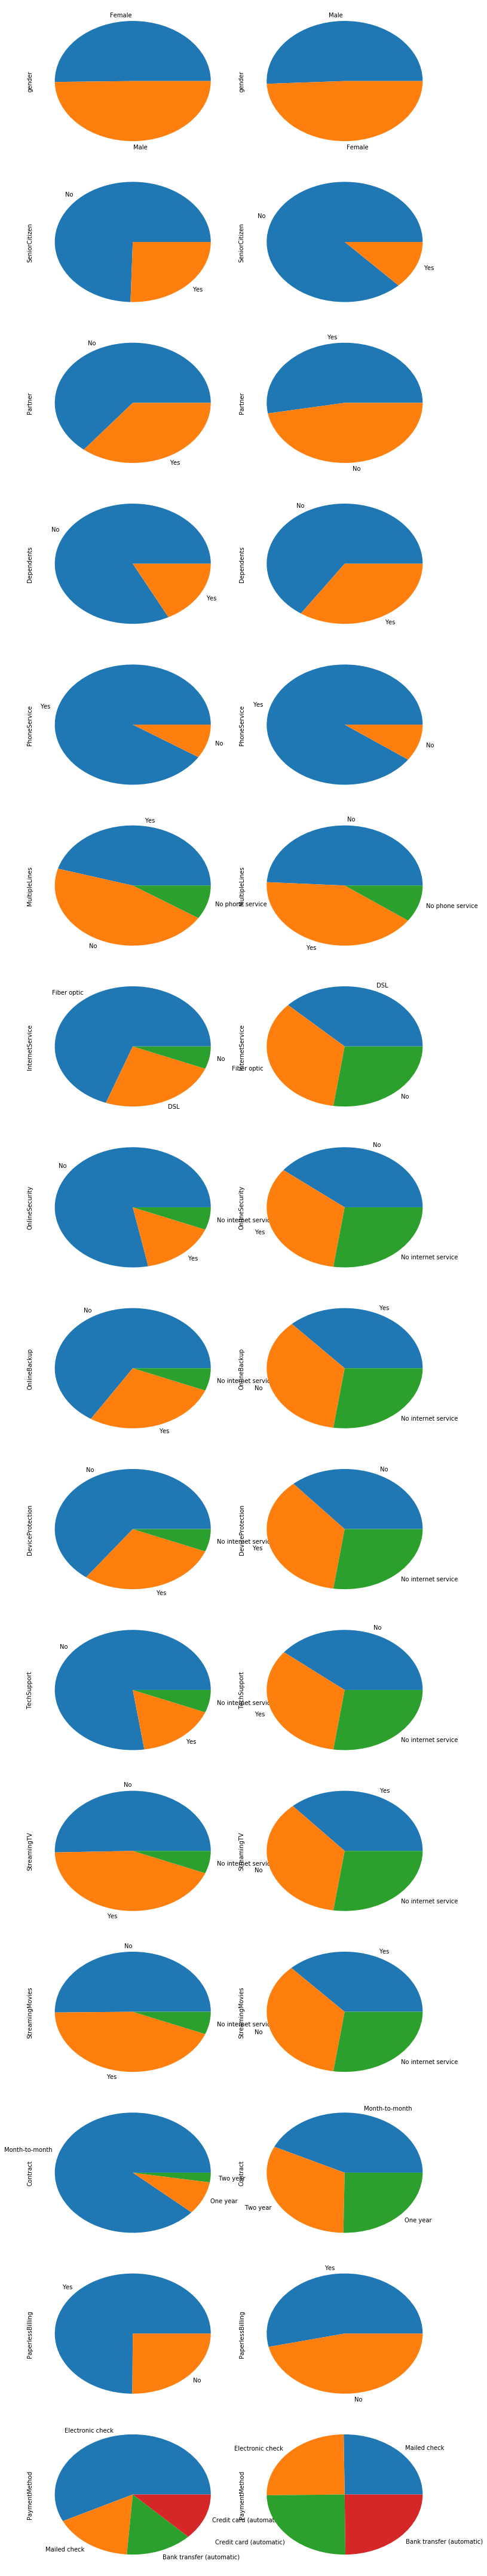

In [152]:
# Plot the pie chart for all categorical features
categorical = df.nunique()[df.nunique() < 10].keys().tolist()
categorical.remove('Churn') # Churn is a label, not a feature
churn = df[df['Churn'] == 1]
not_churn = df[df['Churn'] == 0]

plt.figure(figsize=(10,60))
count = 1

for col in categorical:
    plt.subplot(16, 2, count)
    churn[col].value_counts().plot.pie()
    count += 1
    
    plt.subplot(16, 2, count)
    not_churn[col].value_counts().plot.pie()
    count += 1
    
plt.tight_layout()

### Visualise the proportion of churn customers along the continuous variables

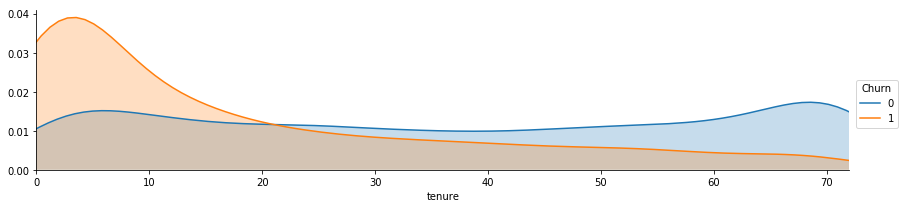

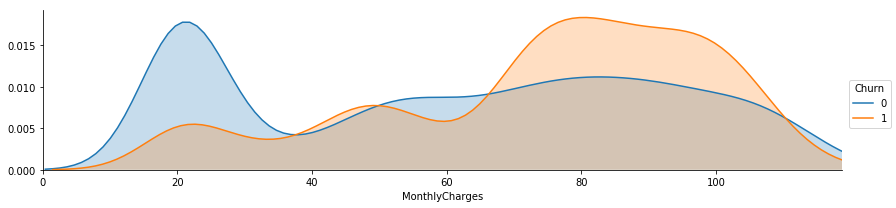

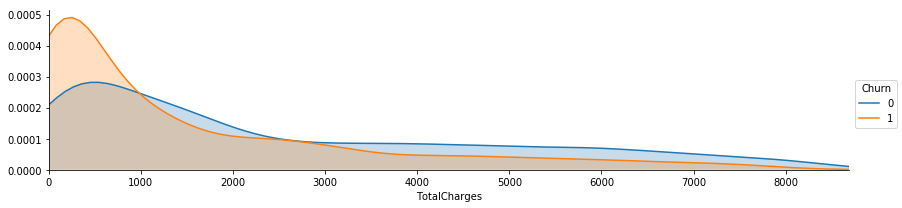

In [153]:
# Plot an area chart for continuous variable
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

plot_distribution(df, 'tenure', 'Churn')
plot_distribution(df, 'MonthlyCharges', 'Churn')
plot_distribution(df, 'TotalCharges', 'Churn')

From the visualisations above, we can observe some interesting patterns:
- Customers with low tenure and high monthly charges are more likely to churn. This is sensible as high charges may discourage customer from using the services from the telco and hence will only stay with the company for a short period of time, as seen from the low tenure
- Some categorical variables, such as OnlineSecurity and TechSupport, seem to be a rather good predictor of whether the customer will churn. The proportion of churn customers using these services is quite different from the proportion of non-churn customers using these services
- On the other hand, some categorical variables, such as gender and PhoneService, seem to be a poor predictor of whether the customer will churn. This can be seen from how there is no significant difference in how these features are distributed among customers who churn and customers who do not churn

We can further confirm this by calculating the <b>correlation</b> of each features with churn.

In [154]:
df.corr()['Churn'].sort_values(ascending = False)

Churn             1.000000
MonthlyCharges    0.193356
TotalCharges     -0.198324
tenure           -0.352229
Name: Churn, dtype: float64

In [155]:
df_cat.corr()['Churn'].sort_values(ascending = False)

Churn                                      1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
PaperlessBilling_Yes                       0.191825
Dependents_No                              0.164221
SeniorCitizen_Yes                          0.150889
Partner_No                                 0.150448
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
PhoneService_Yes                           0.011942
gender_Female                              0.008612
gender_Male 

## Feature Engineering

<div style="text-align: justify">

After exploring the data deeper and gaining understanding regarding the relationship between the different features and the possibility of the customer churning, there might be some additional data outside the given dataset that may be useful in developing the model. While some of these additional data may not be easily obtained, we may be able to <b>engineer some new features using the given features in the dataset</b>. This is the feature engineering step. This step is important as we may be able to discover additional hidden trends or patterns that we were not able to spot before.

</div>

### Create new feature: Number of services

<div style="text-align: justify">

After visualising the data and calculating the correlation against Churn, I realised that many of the Internet Services are correlated moderately to whether a customer will churn or not. This leads me to think that the number of internet services may be able to predict whether a customer will churn or not. Naturally, I would think that the more services that a customer subscribes to, the more satisfied the customer will be and hence, they would be less likely to churn. 

<br><br>

I will attempt to create this new feature by <b>adding how many different services do a customer subscribe to</b>, including online security, online backup, device protection, tech support, streaming TV, streaming movies. Since a customer can only subscribe to these services if they are subscribing to the internet service by the telco, I will need to check whether a customer subscribes to the internet service first.

</div>

In [156]:
df_engin = df[['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

In [157]:
def convert_to_numeric(x):
    if x == "Yes":
        return 1
    elif x == "No":
        return 0
    else: # No internet service
        return 2

df_engin['InternetService'] = df_engin['InternetService'].map(lambda x: 0 if x == "No" else 1)
    
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in services:
    df_engin[col] = df_engin[col].map(convert_to_numeric)
    
df_engin.head()

C:\Users\e0014714\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\e0014714\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,0,0,0,1,29.85,29.85,0
1,1,1,0,1,0,0,0,34,56.95,1889.50,0
2,1,1,1,0,0,0,0,2,53.85,108.15,1
3,1,1,0,1,1,0,0,45,42.30,1840.75,0
4,1,0,0,0,0,0,0,2,70.70,151.65,1


In [158]:
df_engin['NumberOfSvcs'] = df_engin['OnlineSecurity'] + df_engin['OnlineBackup'] + df_engin['DeviceProtection'] + df_engin['TechSupport'] + df_engin['StreamingTV'] + df_engin['StreamingMovies']
df_engin['NumberOfSvcs'] += 1 # They also subscribe to internet service
df_engin.loc[df_engin['InternetService'] == 0, 'NumberOfSvcs'] = 0

df_engin.head()

C:\Users\e0014714\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\e0014714\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,MonthlyCharges,TotalCharges,Churn,NumberOfSvcs
0,1,0,1,0,0,0,0,1,29.85,29.85,0,2
1,1,1,0,1,0,0,0,34,56.95,1889.50,0,3
2,1,1,1,0,0,0,0,2,53.85,108.15,1,3
3,1,1,0,1,1,0,0,45,42.30,1840.75,0,4
4,1,0,0,0,0,0,0,2,70.70,151.65,1,1


<div style="text-align: justify">

The reason why I have <b>included the internet service itself as another service</b> (bumping up the maximum number of services to 7) is to distinguish those customers who pays for internet service but no other services (in this case will be counted as 1) and those customers who do not pay for internet service in the first place (in this case will be counted as 0).

<br><br>

As seen below, it seems that <b>this newly engineered feature is well correlated to whether the customer will churn</b>. The lower the number of services, the more likely you are to churn (the value of churn is closer to 1). This is with the exception of 0 services, which seems to suggest that if you do not subscribe to the internet service at all, i.e. a customer who subscribes to <b>only phone services</b>, you are also less likely to churn.

</div>

In [159]:
df_engin[['NumberOfSvcs', 'Churn']].groupby(['NumberOfSvcs'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,NumberOfSvcs,Churn
1,1,0.522367
2,2,0.457557
3,3,0.358180
4,4,0.273703
5,5,0.223005
6,6,0.124343
0,0,0.074050
7,7,0.052817


### Create new feature: Change in contract

<div style="text-align: justify">

Upon closer observation, we can actually calculate the total charges charged to each customer by multiplying the monthly charges to the tenure - the number of months the customer has been with the telco. Surprisingly, <b>multiplying monthly charges and tenure sometimes results in a value that differs from the total charges </b>.

<br><br>

While there is a possibility that some differences is simply due to accounting error, not all these differences could be dismissed. Some of the differences were quite high and this seems to be caused by another reason. A probable cause in this drastic change could be a change in contract, which results in different monthly charges. This leads me to create a new feature to check whether there is a <b>possible change in contract for certain customers</b>.

</div>

In [160]:
df_engin['SupposedCharge'] = df_engin['tenure'] * df_engin['MonthlyCharges']
df_engin['ChangeContract'] = df_engin['SupposedCharge'] - df_engin['TotalCharges']
# May change contract if the difference is larger than $100, otherwise maybe accounting error
df_engin['ChangeContract'] = df_engin['ChangeContract'].map(lambda x: 1 if abs(x) > 100 else 0) 

df_engin.head()

C:\Users\e0014714\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\e0014714\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\e0014714\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,MonthlyCharges,TotalCharges,Churn,NumberOfSvcs,SupposedCharge,ChangeContract
0,1,0,1,0,0,0,0,1,29.85,29.85,0,2,29.85,0
1,1,1,0,1,0,0,0,34,56.95,1889.50,0,3,1936.30,0
2,1,1,1,0,0,0,0,2,53.85,108.15,1,3,107.70,0
3,1,1,0,1,1,0,0,45,42.30,1840.75,0,4,1903.50,0
4,1,0,0,0,0,0,0,2,70.70,151.65,1,1,141.40,0


In [161]:
df_engin[['ChangeContract', 'Churn']].groupby(['ChangeContract'], as_index=False).mean().sort_values(by='Churn', ascending=False)

,ChangeContract,Churn
0,0,0.276337
1,1,0.187858


From the result above, it seems that you are more likely to churn if there is no change in contract.

## Creation of Machine Learning Model

<div style="text-align: justify">

After exploring the data and creating new features, we are finally ready to create our machine learning model. For this dataset, Churn is a binary label: 0 representing no churn, 1 representing churn. Taking into account that this is a binary classification problem and that we have an expected classification output, we would choose a few supervised machine learning model, including <b>logistic regression</b> and <b>decision tree</b>, and compare the performance of these models in terms of their accuracy. 

<br><br>

Despite being a supervised learning method, k-nearest neighbours may not be appropriate in this case as k-NN model tends to do well when the data is continuous. In this dataset, our features are mainly categorical and k-NN may not be appropriate. Linear regression is also not appropriate as we are predicting a binary output, not a continuous one that linear regression model will give.

</div>

### Plotting Confusion Matrix

In [162]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### Splitting Training and Test Data

In [163]:
# Finalising the dataframe for our model creation
final_df = df_cat # Categorical features

# Continuous features
final_df['tenure'] = df['tenure'] 
final_df['MonthlyCharges'] = df['MonthlyCharges']
final_df['TotalCharges'] = df['TotalCharges']

# Engineered features
final_df['ChangeContract'] = df_engin['ChangeContract']
final_df['NumberOfSvcs'] = df_engin['NumberOfSvcs']

final_df.head()

,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,ChangeContract,NumberOfSvcs
0,0,1,0,1,0,0,1,1,0,1,...,1,0,0,1,0,1,29.85,29.85,0,2
1,0,0,1,1,0,1,0,1,0,0,...,0,0,0,0,1,34,56.95,1889.50,0,3
2,1,0,1,1,0,1,0,1,0,0,...,1,0,0,0,1,2,53.85,108.15,0,3
3,0,0,1,1,0,1,0,1,0,1,...,0,1,0,0,0,45,42.30,1840.75,0,4
4,1,1,0,1,0,1,0,1,0,0,...,1,0,0,1,0,2,70.70,151.65,0,1


In [164]:
X = final_df.drop(['Churn'], axis = 1) # Features
y = final_df['Churn'] # Label

# Split the dataset into 70% training data and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(4930, 48) (4930L,)
(2113, 48) (2113L,)


In [165]:
# k-fold cross validation
kf = KFold(n_splits = 5, shuffle = True, random_state = 12345)

### Logistic Regression

<div style="text-align: justify">

Before running a logistic regression model, it is important to ensure that the values for the <b>continuous variables are standardised</b>. For example, the value for TotalCharges goes up to the thousands and this may cause the coefficients for this feature to be higher. This may unexpectedly increase the weights placed to this feature while it may not necessarily be the most important feature. Thus, we should first run standardisation on continuous features first.

</div>

In [166]:
# Standardise the continuous features
std_scaler = StandardScaler()

std_scaler.fit(final_df[['tenure', 'MonthlyCharges','TotalCharges']])
final_df[['tenure', 'MonthlyCharges', 'TotalCharges']] = std_scaler.transform(final_df[['tenure','MonthlyCharges','TotalCharges']])

final_df.head()

,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,ChangeContract,NumberOfSvcs
0,0,1,0,1,0,0,1,1,0,1,...,1,0,0,1,0,-1.277445,-1.160323,-0.992611,0,2
1,0,0,1,1,0,1,0,1,0,0,...,0,0,0,0,1,0.066327,-0.259629,-0.172165,0,3
2,1,0,1,1,0,1,0,1,0,0,...,1,0,0,0,1,-1.236724,-0.362660,-0.958066,0,3
3,0,0,1,1,0,1,0,1,0,1,...,0,1,0,0,0,0.514251,-0.746535,-0.193672,0,4
4,1,1,0,1,0,1,0,1,0,0,...,1,0,0,1,0,-1.236724,0.197365,-0.938874,0,1


Now, we move on to creating the logistic regression model, which will predict the probability that a customer will churn using the log-likelihood function.

In [167]:
# Fit the model on train data: logistic regression using L2-regularization
lr = LogisticRegression(fit_intercept=True, max_iter=1000, tol=2e-9, penalty='l2', C=100, random_state=0)
lr.fit(X=X_train, y=y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=2e-09,
          verbose=0, warm_start=False)

In [168]:
# Get coefficients
print lr.intercept_, lr.coef_

[0.06492694] [[ 2.48059994e-02  4.01209452e-02 -6.39152803e-02  1.28842225e-01
   5.18308462e-02  1.30960984e-02  5.66270260e-02  8.29991865e-03
  -1.29438050e-01  1.94364995e-01 -1.68278213e-01 -1.29438050e-01
   3.62643208e-01 -7.80200637e-01  9.95417183e-01 -1.50289601e-01
   3.97452533e-01 -1.50289601e-01 -1.82235988e-01  3.04057908e-01
  -1.50289601e-01 -8.88413625e-02  1.99374025e-01 -1.50289601e-01
   1.58425203e-02  3.41765106e-01 -1.50289601e-01 -1.26548561e-01
  -3.58738542e-02 -1.50289601e-01  2.51090400e-01 -5.96622252e-02
  -1.50289601e-01  2.74878771e-01  7.28668965e-01  2.86983096e-02
  -6.92440330e-01 -1.45029974e-01  2.09956919e-01 -3.67449633e-03
  -1.11036944e-01  3.02908286e-01 -1.23269901e-01 -6.00053227e-02
  -4.36050598e-02  3.07685661e-04  9.00555434e-02  3.59402326e-01]]


In [169]:
# Predict outputs for test data
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

Confusion matrix, without normalization
[[1359  171]
 [ 270  313]]


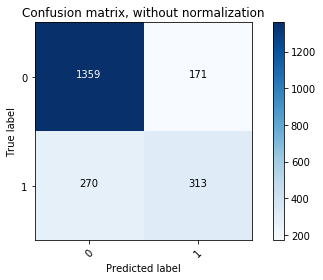

Accuracy: 0.791292001893043


In [170]:
# Plot non-normalized confusion matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
plt.figure()
plot_confusion_matrix(cm, classes=[0,1],
                      title='Confusion matrix, without normalization')
plt.show()
print "Accuracy:", float((TN+TP))/(TN+TP+FP+FN)

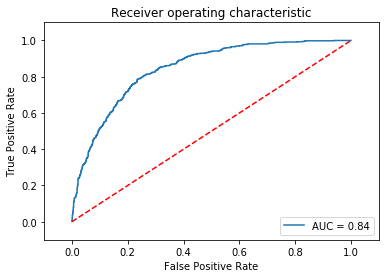

In [171]:
# ROC and AUC

# Get predicted scores Pr(y=1): Used as thresholds for calculating TP Rate and FP Rate
# lr.classes_
score = lr.predict_proba(X_test)[:, 1]

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, score) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.title('Receiver operating characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [172]:
# Average cross-validation score
cv_lr = cross_val_score(lr, X, y, cv = kf, scoring = 'accuracy')
np.mean(cv_lr)

0.8043457440802632

### Decision Tree

Let us compare the logistic regression model to the decision tree model.

In [173]:
# Fit model on train data: decision tree
decision_tree = DecisionTreeClassifier()
decision_tree_model = decision_tree.fit(X_train, y_train)
decision_tree_model.classes_

array([0, 1], dtype=int64)

In [174]:
# Get predicted labels for test data
y_pred = decision_tree_model.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

Confusion matrix, without normalization
[[1247  283]
 [ 286  297]]


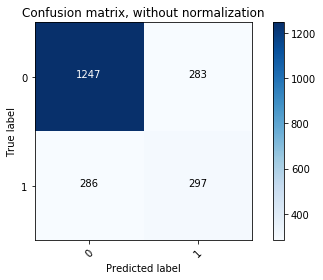

Accuracy: 0.7307146237576905


In [175]:
# Plot non-normalized confusion matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
plt.figure()
plot_confusion_matrix(cm, classes=[0,1],
                      title='Confusion matrix, without normalization')
plt.show()
print "Accuracy:", float((TN+TP))/(TN+TP+FP+FN)

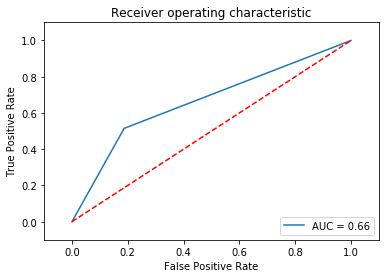

In [176]:
# Get predicted scores Pr(y=1): Used as thresholds for calculating TP Rate and FP Rate
score = decision_tree_model.predict_proba(X_test)[:, 1]

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, score) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.title('Receiver operating characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [177]:
# Average cross-validation score
cv_dt = cross_val_score(decision_tree_model, X, y, cv = kf, scoring = 'accuracy')
np.mean(cv_dt)

0.7300853079230918

<div style="text-align: justify">

It seems that <b>logistic regression model is better</b> because it has an average cross-validation score of about 80.4%, higher than the average cross-validation score of decision tree, which is about 72.8%. However, this is only for a single model. In creating a machine learning model, <b>ensemble learning may be able to generate a better machine learning model</b> by combining multiple models into one machine learning model. Below we will explore the different ensemble learning methods and compare their accuracy to the single model: logistic regression and decision tree

</div>

### Ensemble Learning: Bagging

In [178]:
# Fit Bagging Model; A bundle of decision trees
BA = BaggingClassifier(n_estimators=100, random_state=12345)
BA_model = BA.fit(X_train, y_train)
BA_model.classes_

array([0, 1], dtype=int64)

In [179]:
# Get predicted label for test data
y_pred = BA_model.predict(X_test)

Confusion matrix, without normalization
[[1358  172]
 [ 291  292]]


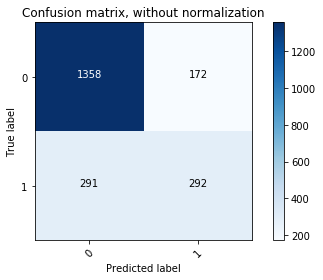

Accuracy: 0.7808802650260294


In [180]:
# Plot non-normalized confusion matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
plt.figure()
plot_confusion_matrix(cm, classes=[0,1],
                      title='Confusion matrix, without normalization')
plt.show()
print "Accuracy:", float((TN+TP))/(TN+TP+FP+FN)

In [181]:
# Average cross-validation score
cv_ba = cross_val_score(BA, X, y, cv = kf, scoring = 'accuracy')
np.mean(cv_ba)

0.781199492709207

### Ensemble Learning: Random Forest

In [182]:
# Fit Random Forest Model; Binary Splitting using Entropy
RF = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=12345)
RF_model = RF.fit(X_train, y_train)
RF_model.classes_

array([0, 1], dtype=int64)

In [183]:
# Get predicted label for test data
y_pred = RF_model.predict(X_test)

Confusion matrix, without normalization
[[1357  173]
 [ 304  279]]


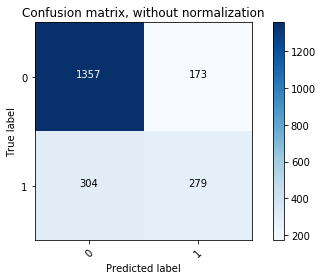

Accuracy: 0.7742546142924751


In [184]:
# Plot non-normalized confusion matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
plt.figure()
plot_confusion_matrix(cm, classes=[0,1],
                      title='Confusion matrix, without normalization')
plt.show()
print "Accuracy:", float((TN+TP))/(TN+TP+FP+FN)

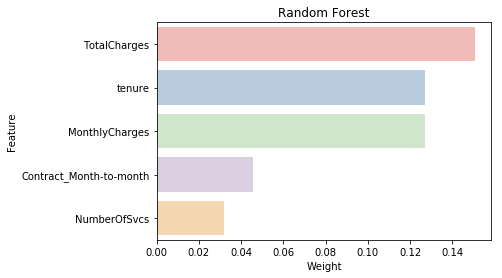

In [185]:
# Feature Importance
RF_feat_im = pd.DataFrame(RF.feature_importances_)
RF_feat_im["Feature"] = list(X) 
RF_feat_im.sort_values(by=0, ascending=False).head()
g = sns.barplot(0,"Feature",data = RF_feat_im.sort_values(by=0, ascending=False)[0:5], palette="Pastel1",orient = "h")
g.set_xlabel("Weight")
g = g.set_title("Random Forest")

In [186]:
# Average cross-validation score
cv_rf = cross_val_score(RF, X, y, cv = kf, scoring = 'accuracy')
np.mean(cv_rf)

0.7838975498419253

### Ensemble Learning: Adaboost

In [187]:
# Fit Adaboosting Model
Ada = AdaBoostClassifier(n_estimators=100, random_state=12345)
Ada_model = Ada.fit(X_train, y_train)
Ada_model.classes_

array([0, 1], dtype=int64)

In [188]:
# Get predicted label for test data
y_pred = Ada_model.predict(X_test)

Confusion matrix, without normalization
[[1365  165]
 [ 267  316]]


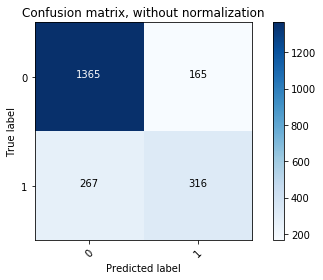

Accuracy: 0.795551348793185


In [189]:
# Plot non-normalized confusion matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
plt.figure()
plot_confusion_matrix(cm, classes=[0,1],
                      title='Confusion matrix, without normalization')
plt.show()
print "Accuracy:", float((TN+TP))/(TN+TP+FP+FN)

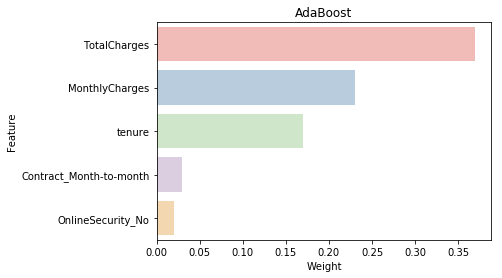

In [190]:
# Feature Importance
Ada_feat_im = pd.DataFrame(Ada.feature_importances_)
Ada_feat_im["Feature"] = list(X) 
Ada_feat_im.sort_values(by=0, ascending=False).head()
g = sns.barplot(0,"Feature",data = Ada_feat_im.sort_values(by=0, ascending=False)[0:5], palette="Pastel1",orient = "h")
g.set_xlabel("Weight")
g = g.set_title("AdaBoost")

In [191]:
# Average cross-validation score
cv_ada = cross_val_score(Ada, X, y, cv = kf, scoring = 'accuracy')
np.mean(cv_ada)

0.8023573093425383

## Conclusion

In [192]:
# Comparing the average cross-validation score for different models
print "Average cross-validation score for different models"
print "Logistic regression: ", np.mean(cv_lr)
print "Decision tree: ", np.mean(cv_dt)
print "Bagging: ", np.mean(cv_ba)
print "Random forest: ", np.mean(cv_rf)
print "Adaboost: ", np.mean(cv_ada)

Average cross-validation score for different models
Logistic regression:  0.8043457440802632
Decision tree:  0.7300853079230918
Bagging:  0.781199492709207
Random forest:  0.7838975498419253
Adaboost:  0.8023573093425383


<div style="text-align: justify">

In conclusion, for this dataset, <b>logistic regression performed the best, followed by Adaboost model</b>. This result is rather surprising considering that single model outperforms ensemble learning method. Some features that are considered important includes: <b>TotalCharges, MonthlyCharges, tenure, NumberOfSvcs and Contract</b>. These are probably the factors that predict whether a customer will churn the best and the telco company should pay more attention to these factors in order to prevent further loss of customer in the future.

</div>